In [3]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import datetime
import os
import sys
sys.path.insert(0,"../HUXt/code")
import huxt as H
import huxt_analysis as HA
import huxt_inputs as Hin
import sunpy
from sunpy.coordinates import sun
import httplib2

### This notebook takes you through the first few steps of using HUXt. A link to the main example notebook is here: https://github.com/University-of-Reading-Space-Science/HUXt/blob/master/code/HUXt_examples.ipynb. 

### Task one: review this notebook, try running parts of it by copy pasting into this new notebook. 

-Identify where you create an input for the boundary condition. 

-Identify where you run the model. 

-Identify where you view the timeseries/radial profile. 

-Identify where you can view the 2D model output.  

-Identify where you can inject a CME. 

No initiation time specified. Defaulting to start of CR2000, 20/2/2003


(<Figure size 1400x700 with 1 Axes>,
 <Axes: title={'center': 'HUXt Radius: 214.50$R_{sun}$  Longitude: 0.02$^\\circ$'}, xlabel='Time (days)', ylabel='Solar Wind Speed (km/s)'>)

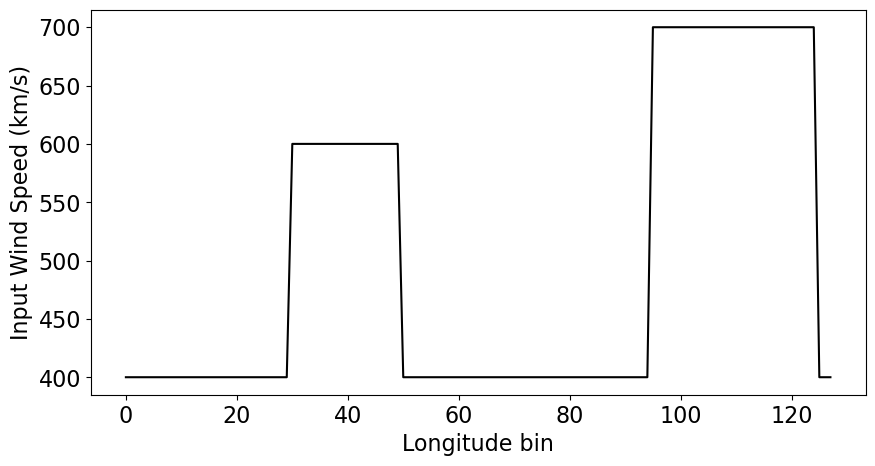

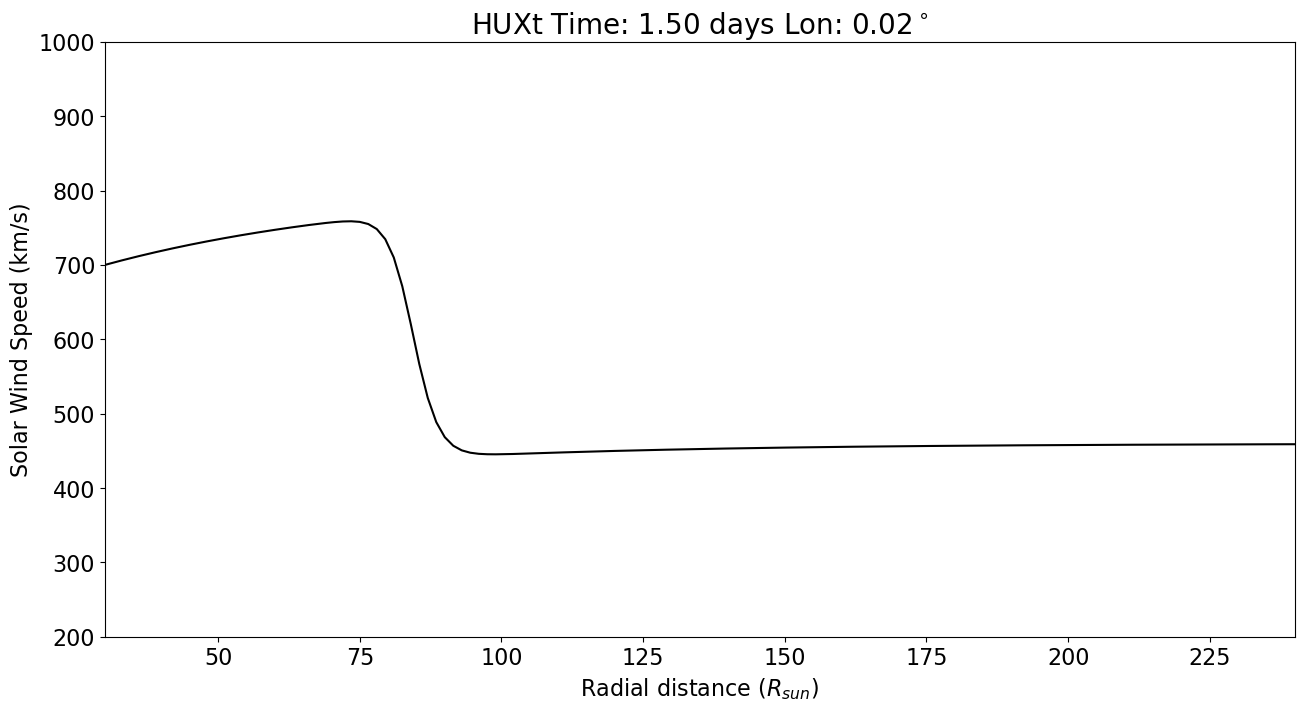

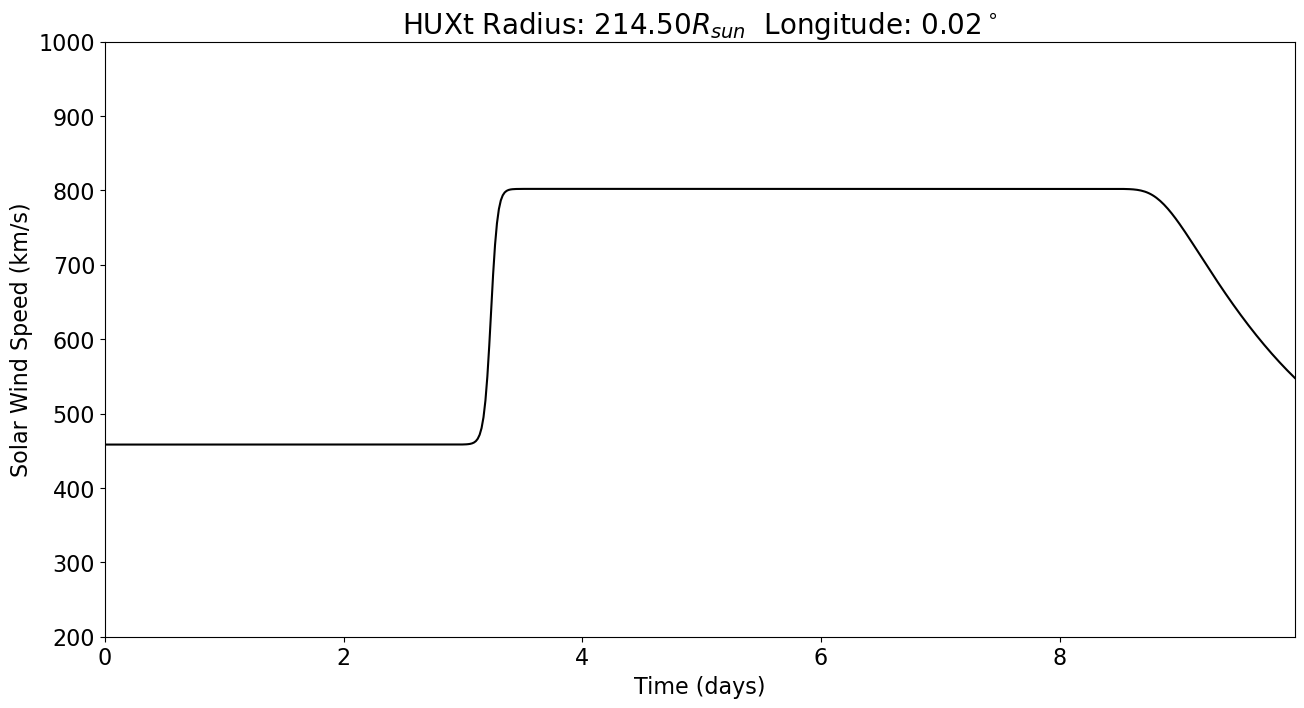

In [6]:
#EXAMPLE 1
#Form longitudinal boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 400 * (u.km/u.s)
v_boundary[30:50] = 600 * (u.km/u.s)
v_boundary[95:125] = 700 * (u.km/u.s)

# This boundary condition looks like
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(v_boundary,'k-')
ax.set_xlabel('Longitude bin')
ax.set_ylabel('Input Wind Speed (km/s)')

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
model = H.HUXt(v_boundary=v_boundary, lon_out=0.0*u.deg, simtime=10*u.day, dt_scale=4)

# Solve these conditions, with no ConeCMEs added.
cme_list = []
model.solve(cme_list)

# Plot the radial profile of the ambient wind profile at a fixed time (in days). 
t = 1.5*u.day
HA.plot_radial(model, t, lon=0.0)

# Plot the time series of the ambient wind profile at a fixed radius. 
r = 1.0*u.AU
HA.plot_timeseries(model, r, lon=0.0)

No initiation time specified. Defaulting to start of CR2000, 20/2/2003


(<Figure size 1400x700 with 1 Axes>,
 <Axes: title={'center': 'HUXt Radius: 214.50$R_{sun}$  Longitude: 0.02$^\\circ$'}, xlabel='Time (days)', ylabel='Solar Wind Speed (km/s)'>)

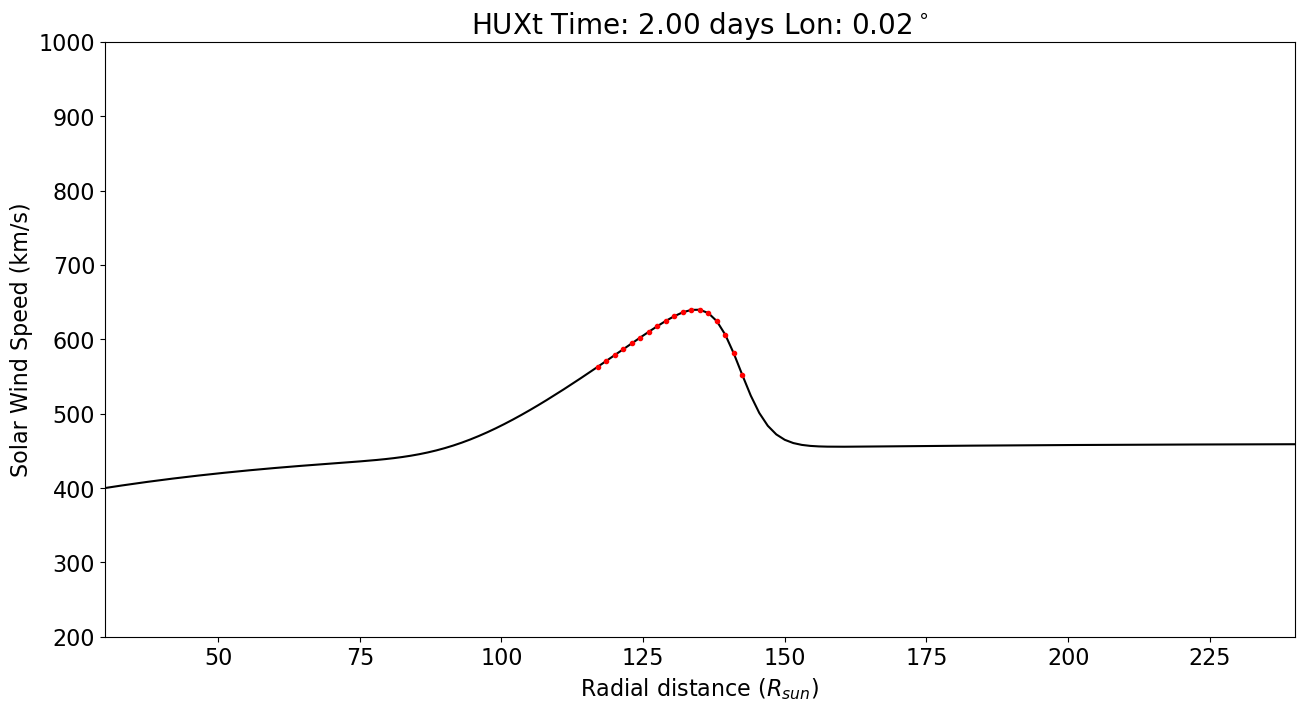

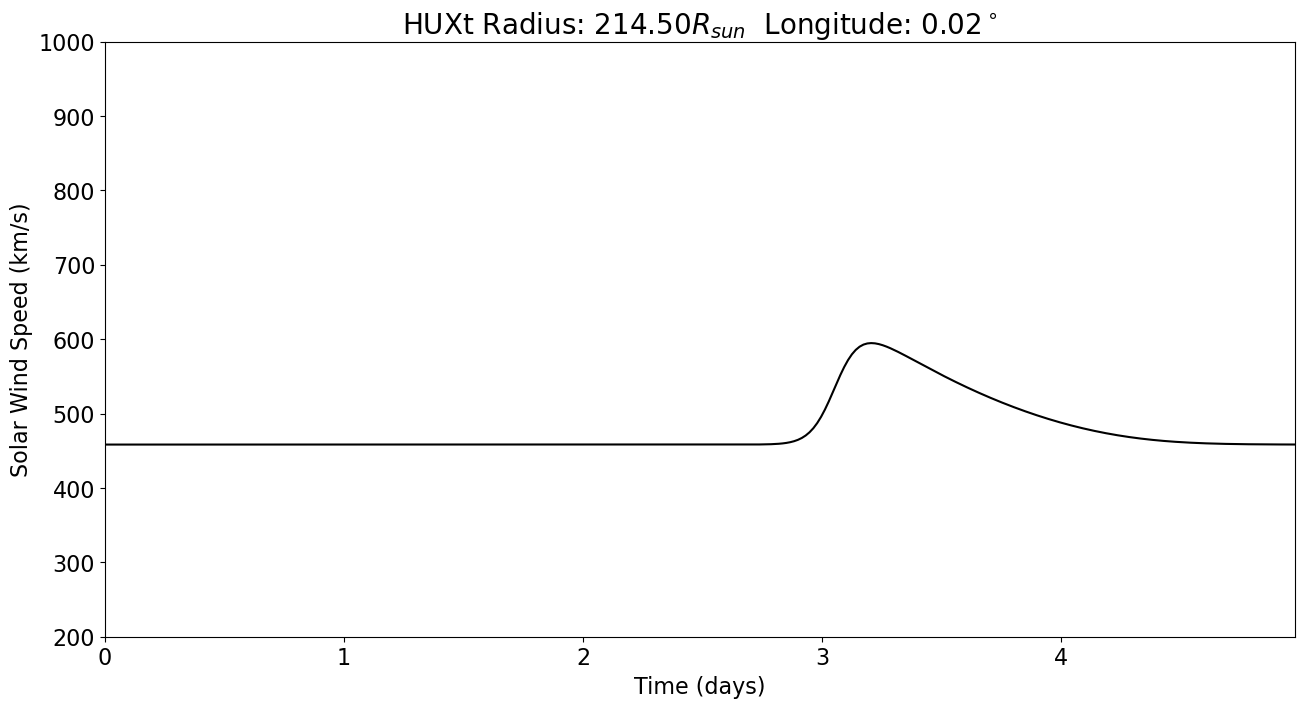

In [8]:
# EXAMPLE 2
# Set up a ConeCME that launches half a day after the simulation begins, at 0 longitude, 30 degree width, speed 850km/s and thickness=5 solar radii
cme = H.ConeCME(t_launch=0.5*u.day, longitude=0.0*u.deg, width=30*u.deg, v=850*(u.km/u.s), thickness=5*u.solRad)
cme_list = [cme]

# Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step), looking at 0 longitude
#Form longitudinal boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 400 * (u.km/u.s)
model = H.HUXt(v_boundary=v_boundary, lon_out=0.0*u.deg, simtime=5*u.day, dt_scale=4)

# Run the model, and this time save the results to file.
model.solve(cme_list, save=True, tag='1d_conecme_test')

# Plot the radial profile and time series of both the ambient and ConeCME solutions at a fixed time (in days). 
# Save both to file as well. These are saved in HUXt>figures>HUXt1D
t = 2*u.day
HA.plot_radial(model, t, lon=0.0*u.deg, save=True)

r = 1.0*u.AU
HA.plot_timeseries(model, r, lon=0.0*u.deg, tag='1d_cone_test_radial')

No initiation time specified. Defaulting to start of CR2000, 20/2/2003


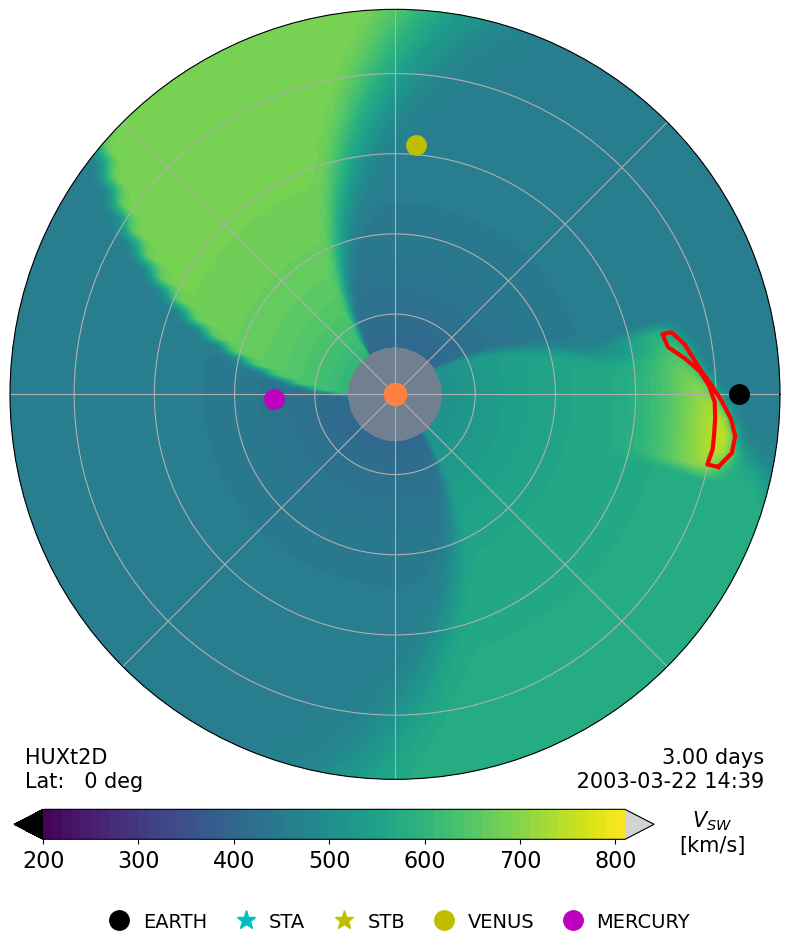

In [10]:
#EXAMPLE 3
#Form boundary conditions - background wind of 400 km/s with two fast streams.
v_boundary = np.ones(128) * 400 * (u.km/u.s)
v_boundary[30:50] = 600 * (u.km/u.s)
v_boundary[95:125] = 500 * (u.km/u.s)

#  Add a CME
cme = H.ConeCME(t_launch=1*u.day, longitude=360*u.deg, latitude = 0*u.deg, width=30*u.deg, v=1500*(u.km/u.s), thickness=5*u.solRad)
cme_list = [cme]

#  Setup HUXt to do a 5 day simulation, with model output every 4 timesteps (roughly half and hour time step)
model = H.HUXt(v_boundary=v_boundary, latitude = 0*u.deg, simtime=6*u.day, dt_scale=4)

model.solve(cme_list, tag='cone_cme_test')

# Plot this out
t_interest = 3*u.day
fig, ax = HA.plot(model, t_interest)

### Task two: next, try reproducing example four, and changing the carrington rotation number to se the model change. 

#### For each carrington roation you try, plot the boundary condition on one figure to see how different they are. 


Files already exist for CR2260


Text(0.5, 0.98, 'MAS/HUXt')

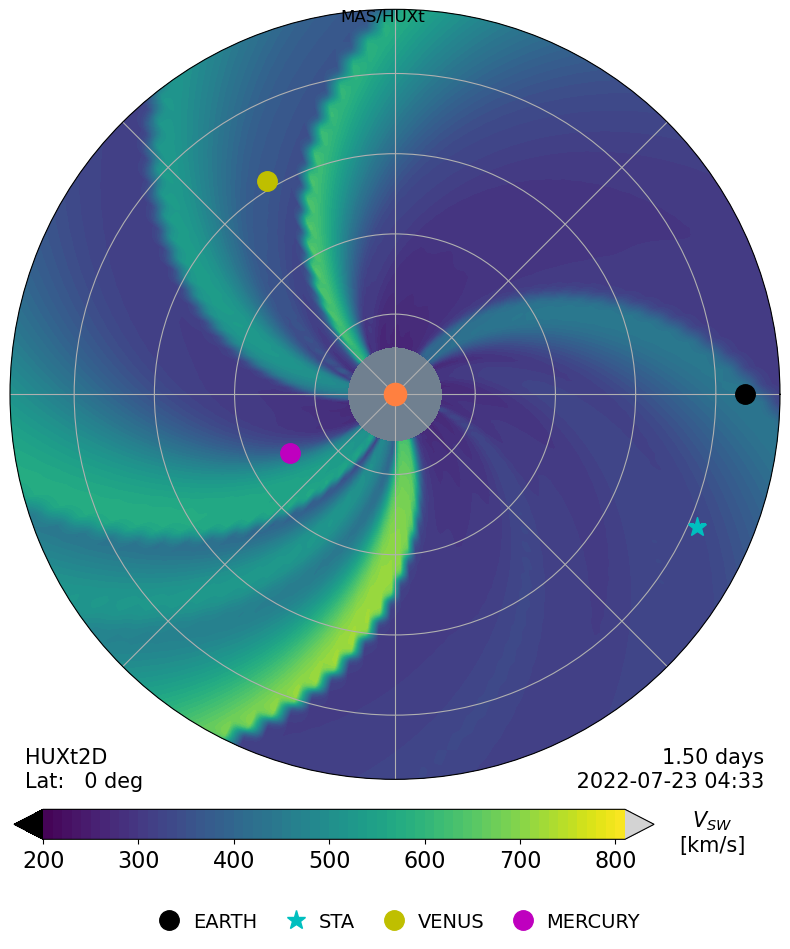

In [13]:
# EXAMPLE 4
#HUXt can be easily initiated MAS, by specifying a carrington rotation number. Data are downloaded from the Pred Sci Inc archive on demand
cr = 2260
v_mas = Hin.get_MAS_long_profile(cr, 0.0*u.deg)

#MAS solutions are at 30 rS
model = H.HUXt(v_boundary=v_mas, cr_num=cr, simtime=5*u.day, dt_scale=4, r_min = 30*u.solRad)
model.solve([])

# Plot the solution 
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('MAS/HUXt')

Text(0.5, 0.98, 'CorTom/HUXt')

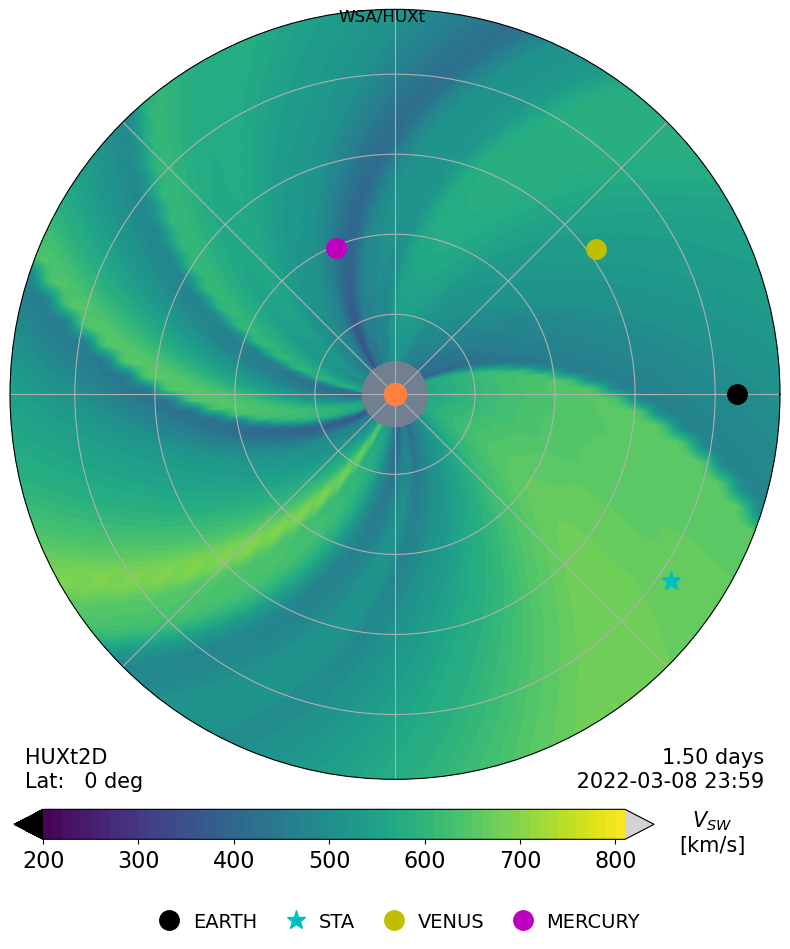

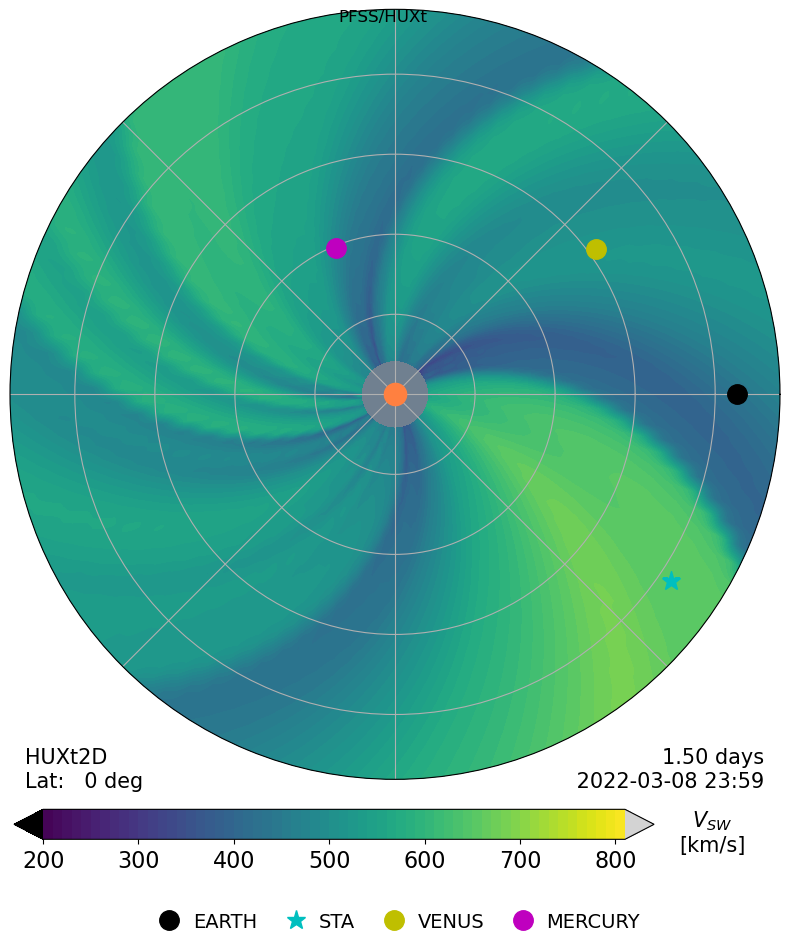

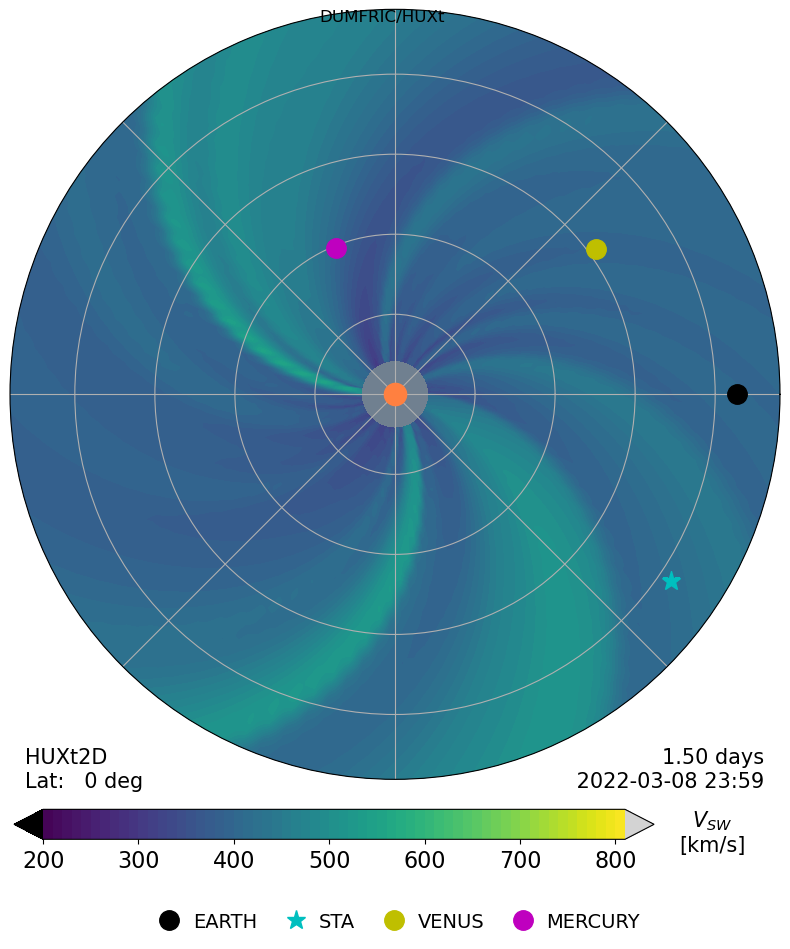

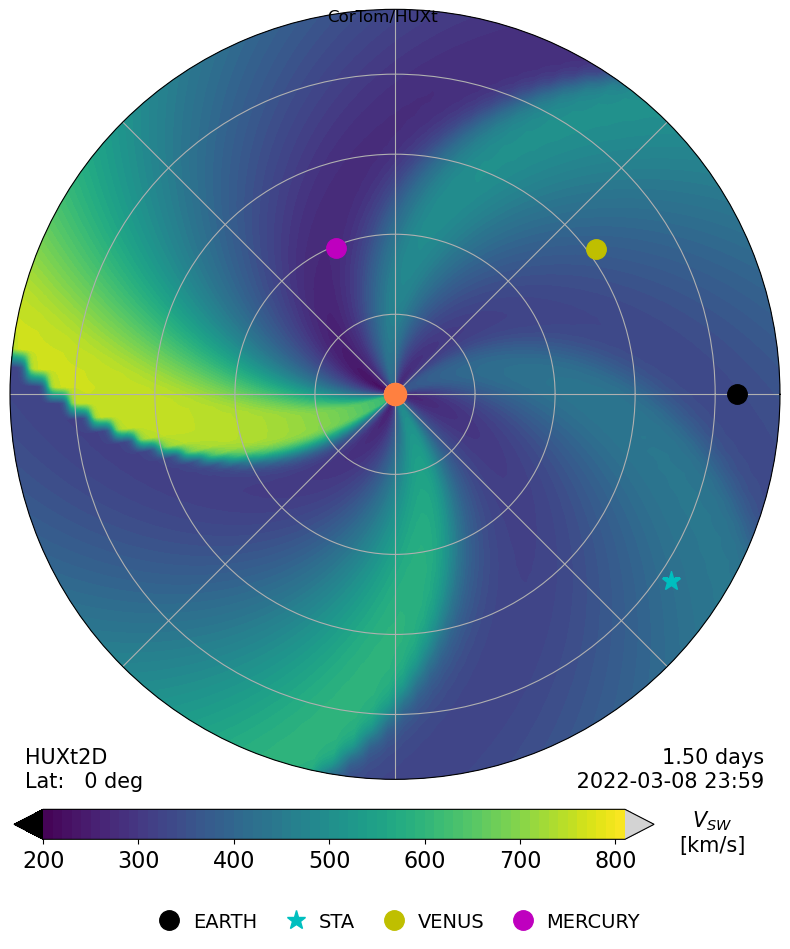

In [17]:
# example 4 (cont.) 
# read in the data
cr = 2255

demo_dir = H._setup_dirs_()['example_inputs']

wsafilepath = os.path.join(demo_dir, '2022-02-24T22Z.wsa.gong.fits')
pfssfilepath = os.path.join(demo_dir, 'windbound_b_pfss20220224.22.nc')
cortomfilepath = os.path.join(demo_dir, 'tomo_sta_cor2_20240224153428_8-0.dat')
dumfricfilepath = os.path.join(demo_dir, 'windbound_b20220224.12.nc')

v_wsa = Hin.get_WSA_long_profile(wsafilepath, lat=0.0 * u.deg)
v_pfss = Hin.get_PFSS_long_profile(pfssfilepath, lat=0.0 * u.deg)
v_dumfric = Hin.get_PFSS_long_profile(dumfricfilepath, lat=0.0 * u.deg) #DUMFRIC uses the PFSS reader too
v_cortom = Hin.get_CorTom_long_profile(cortomfilepath, lat=0.0 * u.deg)

# set up and run the models. WSA and PFSS maps are at 21.5 rS, CorTom at 8 rS
model = H.HUXt(v_boundary=v_wsa, cr_num=cr, simtime=5*u.day, dt_scale=4, r_min = 21.5*u.solRad)
model.solve([])
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('WSA/HUXt')

model = H.HUXt(v_boundary=v_pfss, cr_num=cr, simtime=5*u.day, dt_scale=4, r_min = 21.5*u.solRad)
model.solve([])
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('PFSS/HUXt')

model = H.HUXt(v_boundary=v_dumfric, cr_num=cr, simtime=27*u.day, dt_scale=4, r_min = 21.5*u.solRad)
model.solve([])
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('DUMFRIC/HUXt')

model = H.HUXt(v_boundary=v_cortom, cr_num=cr, simtime=27*u.day, dt_scale=4, r_min = 8*u.solRad)
model.solve([])
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('CorTom/HUXt')

In [18]:
# huxt_inputs also has a function to create coneCME objects from the cone2bc.in files that are used to drive Enlil.

[-441059.9574022411, -1.0, 0.13962634015954636, 0.5934119456780721, 500.0, 14957550.0, 4572981.954451986, 3478500.0, 5.8643062867009474, False, False, 21600.0]
[-412499.9574022411, -1.0, 0.5235987755982988, 0.6981317007977318, 650.0, 14957550.0, 5444102.977548435, 3478500.0, 6.161012259539983, False, False, 21600.0]
[-341099.9574022412, -1.0, 0.5235987755982988, 0.767944870877505, 601.0, 14957550.0, 6043242.4742406495, 3478500.0, 0.0, False, False, 21600.0]
[-328619.9574022411, -1.0, -0.3141592653589793, 0.5934119456780721, 319.0, 14957550.0, 4572981.954451986, 3478500.0, 1.3962634015954636, False, False, 21600.0]
[-270539.9574022412, -1.0, -0.5934119456780721, 1.3264502315156905, 323.0, 14957550.0, 11686118.822755553, 3478500.0, 5.759586531581287, False, False, 21600.0]
[-241439.95740224118, -1.0, 0.4363323129985824, 0.5235987755982988, 811.0, 14957550.0, 4007863.4432481397, 3478500.0, 0.10471975511965978, False, False, 21600.0]
[-229499.95740224115, -1.0, 0.9599310885968813, 0.872664

Text(0.5, 0.98, 'WSA/HUXt')

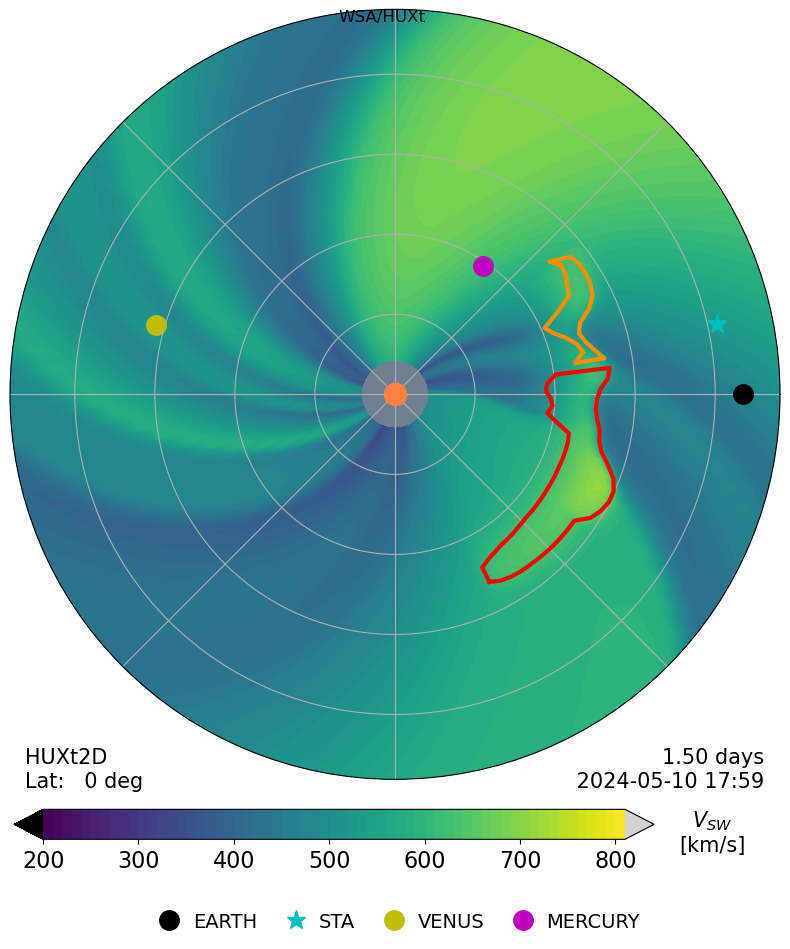

In [19]:
demo_dir = H._setup_dirs_()['example_inputs']

wsafilepath = os.path.join(demo_dir, 'wsa_gong_2024050906.fits')
v_wsa = Hin.get_WSA_long_profile(wsafilepath, lat=0.0 * u.deg)

time = datetime.datetime(2024, 5, 9, 6)
cr, cr_lon_init = Hin.datetime2huxtinputs(time)

model = H.HUXt(v_boundary=v_wsa, cr_num=cr, cr_lon_init=cr_lon_init, simtime=5*u.day, dt_scale=4, r_min = 21.5*u.solRad)

conefilepath = os.path.join(demo_dir, 'cone_cme_2024050906.in')
cme_list = Hin.ConeFile_to_ConeCME_list(model, conefilepath)

for cme in cme_list:
    print(cme.parameter_array())
    #print(cme.compute_arrival_at_body('EARTH'))

model.solve(cme_list)
fig, ax = HA.plot(model, 1.5*u.day)
fig.suptitle('WSA/HUXt')